# LinearRegressionをスクラッチで書く

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## y = 5x+3の周りに正規分布に沿った乱数を発生させる

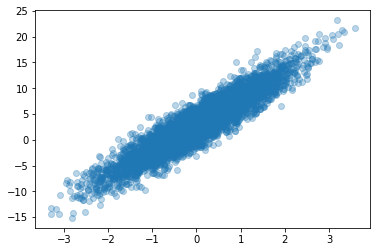

In [2]:
np.random.seed(10000)
size = 5000
x = np.random.randn(size)

mu, sigma = 0, 2 
y = 5*x + 3 + np.random.normal(mu, sigma, size)

plt.scatter(x,y,alpha=0.3)
plt.show()

## 当てはまりがよさそうな直線を、適当に複数引いてみる

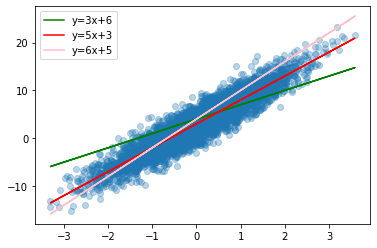

In [10]:
plt.scatter(x,y,alpha=0.3)
plt.plot(x,3*x+4,c='green',label="y=3x+6")
plt.plot(x,5*x+3,c='red',label="y=5x+3")
plt.plot(x,6*x+4,c='pink',label="y=6x+5")
plt.legend(loc='best')
plt.show()

## 損失関数を定義

xをx=xiの点で固定したときの、実値と予想値の差は

$$
    |Y_i-(\alpha+\beta*X_i)| \quad
$$

であるから、すべてのxで、実値と予想値との差をとり合計すると次のように書ける。

$$
    \sum_{i=1}^{n}\sqrt{(Y_i-(\alpha+\beta*X_i))^2} \quad
$$

これはαとβの値によって残渣の合計の値も変わるため、αとβの関数と考えられ、損失関数は次のように書ける。

$$
    f(\alpha,\beta)= \sum_{i=1}^{n}\sqrt{(Y_i-(\alpha+\beta*X_i))^2} \quad
$$

損失関数の最小値を求める問題は、ルートの中が2乗されているため0以上であるので、次の関数を最小にする問題と同値である。

$$
    f(\alpha,\beta)= \sum_{i=1}^{n}(Y_i-(\alpha+\beta*X_i))^2 \quad
$$



In [12]:
def objective_function(alpha,beta):
    error = (y - (beta *x + alpha))
    error_squared = error**2
    sum_of_error_squared = np.sum(error_squared)
    return sum_of_error_squared

## 損失関数の勾配を定義

損失関数を最小にするためにαとβの勾配を考える。

$$
    \frac{\partial}{\partial \alpha}f(\alpha,\beta) = -2\sum_{i=1}^{n}(Y_i-(\alpha+\beta*X_i))
$$

$$
    \frac{\partial}{\partial \beta}f(\alpha,\beta) = -2\sum_{i=1}^{n}(X_i*(Y_i-(\alpha+\beta*X_i)))
$$

In [5]:
def alpha_deriv(alpha, beta):
    return (-2.0 * (y - alpha - beta * x)).sum()

def beta_deriv(alpha, beta):
    return (-2.0 * x * (y - alpha - beta * x)) .sum()

In [6]:
def linear_reg(init_alpha, init_beta, learning_ratio,max_iteration):
    alpha = init_alpha
    beta = init_beta
    alpha_hist=[]
    beta_hist=[]
    y = []
    count = []
    for i in range(max_iteration):
        next_alpha = alpha+alpha_deriv(alpha,beta)*(-1)*learning_ratio
        next_beta  = beta+beta_deriv(alpha,beta)*(-1)*learning_ratio    
        if ((next_alpha-alpha)**2+(next_beta-beta)**2)<0.0000001:
            break
        yscore = objective_function(alpha, beta)
        alpha_hist.append(alpha)
        beta_hist.append(beta)
        y.append(yscore)
        alpha = next_alpha
        beta = next_beta
        count.append(i)
        
    return y, alpha, beta, alpha_hist, beta_hist, count

alpha： 2.999
beta： 4.968
Iteration： 72
Value of LossFunction 19808


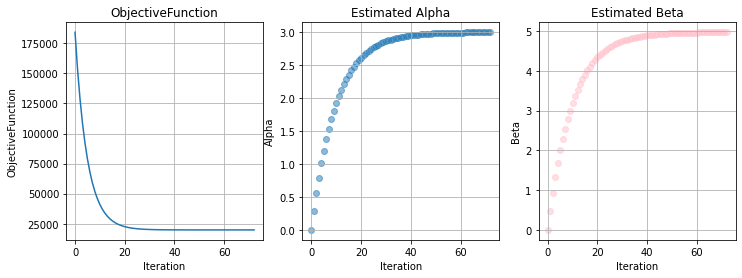

In [19]:
init_alpha = 0
init_beta = 0
learning_ratio = 0.00001
max_iteration = 300

cost_history, current_alpha, current_beta, alpha_hist, beta_hist,count = linear_reg(init_alpha, init_beta, learning_ratio, max_iteration)

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))

axes[0].plot(cost_history)
axes[0].set_title('ObjectiveFunction')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('ObjectiveFunction')
axes[0].grid(True)

axes[1].scatter(count,alpha_hist,alpha=0.5)
axes[1].set_title('Estimated Alpha')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Alpha')
axes[1].grid(True)


axes[2].scatter(count,beta_hist,c='pink',alpha=0.5)
axes[2].set_title('Estimated Beta')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Beta')
axes[2].grid(True)


print('alpha：',round(current_alpha,3))
print('beta：',round(current_beta,3))
print('Iteration：',max(count))
print('Value of LossFunction',round(objective_function(current_alpha, current_beta)))

最初に設定した散布図は、y=3x+5の周りに正規分布に沿った乱数を発生させてプロットしたものであったため、alphaが3、betaが5に近い値が取得できるはずであり、上記はそれを表している。

# Sklearnで確かめてみる

In [58]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('Alpha：',LR.intercept_[0])
print('Beta：',LR.coef_[0][0])

Alpha： 3.0002092117042976
Beta： 4.971236303809565


確かに、alphaとbetaの値が、それぞれ3と5に近いことが確認できる。